# Resumen de programación de econometría básica


## Fórmulas
- Modelo econométrico:
$$
Y_{t} = B_{0} + B_{1}X_{1t} + B_{2}X_{2t} + B_{3}X_{3t} + B_{4}X_{4t} + \hat{e}_{t} 
$$
- Beta de mínimos cuadrados ordinarios:
$$
\hat{\beta} = (X^TX)^{-1} X^T Y
$$
- Beta de máxima verosimilitud restringida:
$$
\beta^{*} = \beta^{moño} + (X^tX)^{-1} R^t(R(X^tX)^{-1}R^t)^{-1}(r - RB)
$$
- Sigma cuadrado estimado:
$$
\hat{\sigma}^2 = \dfrac{\sum_{t = 1}^{T}(e_{t}^2)}{T - K} = \dfrac{\hat{e}^t\hat{e}}{T - K}
$$
- Jarque - Bera:
$$
Jarque - Bera = T \left[\dfrac{S^2}{6} + \dfrac{(K - 3)^2}{24}\right]
$$
$$
S = \dfrac{\sum_{t=1}^{T}\hat{e}^3}{\left[\sqrt{\dfrac{\hat{e}^t\hat{e}}{T}}\right]^3} \qquad
K = \dfrac{\sum_{t=1}^{T}\hat{e}^4}{\left[\sqrt{\dfrac{\hat{e}^t\hat{e}}{T}}\right]^4} \qquad
X^2_{2 gl} \rArr 5.99, \alpha = 0.05
$$
- T. Raíz de multiplicadores de Lagrange:
$$
\sqrt{\lambda_{1}} = \dfrac{RB - r}{\sqrt{var-cov(RB)}}
$$
- T. Multiplicadores de Lagrange:
$$
\lambda_{1} = \dfrac{(RB - r)^t(R(X^tX)^{-1}R^t)^{-1}(Rb - r)}{J * \hat{\sigma^2}}
$$
- T. Razón de verosimilitud:
$$
\lambda_{2} = \dfrac{SRC_{r} - SRC_{nr}}{J * \hat{\sigma^2}} 
$$
- T. de Wold:
$$
\lambda_{3} = \dfrac{(\beta^* - \hat{\beta})^t(X^tX)(\beta^* - \hat{\beta})}{J * \hat{\sigma^2}}
$$
- Matriz P de Cholesky:
$$
P = \left[\begin{matrix}
\sqrt{1 - \rho^2} & 0 & 0 & \cdots & 0\\
-\rho & 1 & 0 & \cdots & 0\\
0 & -\rho & 1 & \cdots & 0\\
\vdots & \vdots &\vdots & &\vdots\\
0 & 0 & 0 & -\rho & 1 
\end{matrix}\right]
$$

## Tablas de valores críticos a sus correspondientes funciones

### t - Student
<center><img src= "https://s2.studylib.es/store/data/004733881_1-8ecca861e69bbe606595fbbb2678aa48.png" title = 'Tabla de valores Durbin Watson' width="700px" ></center>

### F - Fisher
<center><img src= "https://s2.studylib.es/store/data/004504250_1-2725255d6bf83ea467bfcddeccaffe34.png" title = 'Tabla de valores Durbin Watson' width="700px" ></center>

### Chi - Cuadrado
<center><img src= "https://s2.studylib.es/store/data/009068381_1-56977908f099a36707a531e9b75ccbdf-768x994.png" title = 'Tabla de valores Durbin Watson' width="700px" ></center>

In [4]:
# Llamado de librerias
library(dplyr)
library(ggplot2)
library(lmtest)
library(gtools)
library(shiny)

In [5]:
# Importando archivo .csv
File = read.csv(file = ('../Macroeconometría/Basedatos.csv'), skip = 0, header = TRUE)
head(File)

Warning message in file(file, "rt"):
"cannot open file '../Macroeconometría/Basedatos.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


## Intervalos de Confianza
- Se utiliza únicamente cuanado se tiene una única restricción.
- Como no se conoce el valor poblacional no se utiliza una z si no una t con un sigma^2 de mínimos cuadrados ordinarios (OLS) dado que es insegado.
- De los coeficientes estimados cabe resaltar que el intercepto no siempre tiene un significado o tenido en cuenta.
- Se puede interpretar como:
  - De cada 100 veces que muestree con un alpha = 0.05, 95 muestras serán H0.
  - El muestreo repetido en promedio en el intervalo [A, C] contendrá a RB (1 - alpha) veces.
  - Hay / No hay sufieciente evidencia para rechazar H0 a un nivel de confianza del (alpha %) dejando todo lo demás constante. 
- A de tenerse en cuenta que para poder realizar la estimación se deben de cumplir los suspuestos básicos de regresión para lo que se debe de probar normalidad en los errores por medio de la prueba de Jarque - Bera, en donde si hubiese suficiente evidencia para rechazar H0 (H0 : Los errores se comportan normal), tocaría revisar la muestra para poder realizar la estimación.

In [5]:
# Inputs
Test = '2t'                             # '1tl', '1tr', '2t'
R = c(0, 0, 0, 0, 1)                    # Matriz de diseño de las restricciones
r = c(0.8)                              # Matriz de diseño del valor de las restricciones
alpha = 0.05                            # Nivel de significancia 

# Parámetros y transformaciones lineales
Y = log(File$Cij)
X1 = log(File$Yi)
X2 = log(File$Yj)
X3 = log(File$Dij)
X4 = (File$Acuerdo)
T = length(Y)
K = ncol(File) - 2

# Estimación de los betas
Y = cbind(Y)
X = cbind(1, X1, X2, X3, X4)
Betasm = solve(t(X) %*% X) %*% (t(X) %*% Y)

#Salidas
Betasm

,Y
,3.3276373
X1,0.4660302
X2,0.7467393
X3,-0.7893841
X4,-0.1382530


[1] "No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: 0.05, por medio del test de Jarque Bera sobre normalidad en los errores"
[1] "El intervalo de confianza a 0.05 es: [-0.7713, 0.4948]"
[1] "El intervalo de confianza de 2t es [-0.7713, 0.4948]"
[1] "Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: 0.05"


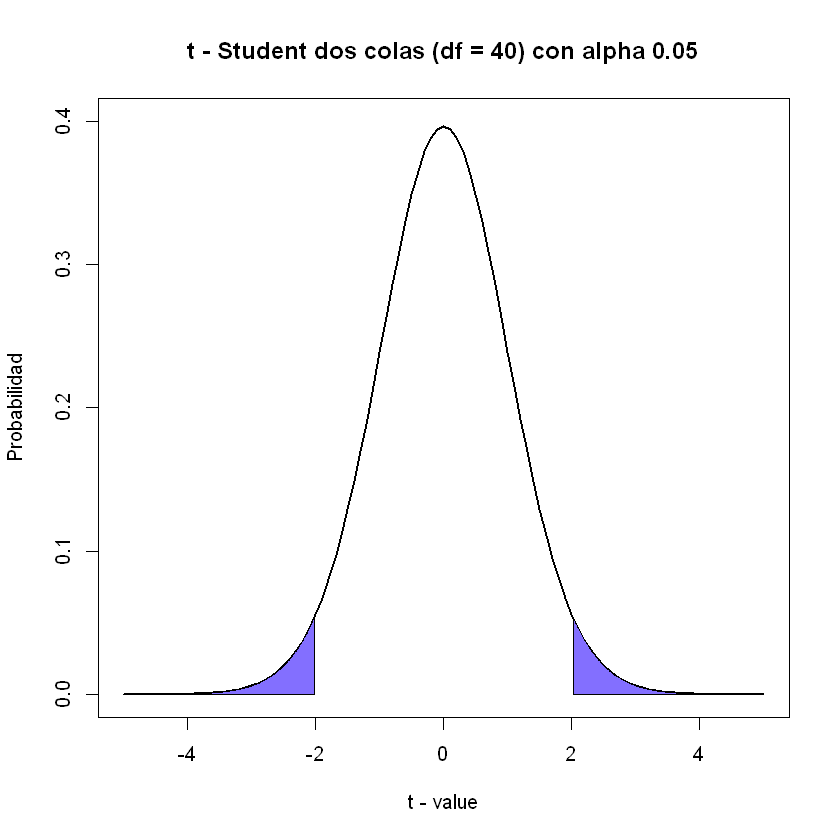

In [6]:
# Estimación sigma^2 (Beta moño de OLS)
Ym = X %*% Betasm
Em = Y - Ym
sigma2 = as.numeric((t(Em) %*% Em) / (T - K))

#Prueba Jarque Bera (Normalidad en el error)
# JB = jarque.bera.test(Em)                                         #Forma rápida
S = (sum((Em - mean(Em)) ** 3) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 3)           # Asimetría
K1 = (sum((Em - mean(Em)) ** 4) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 4)          # Kurtosis
JB = T * ((S ** 2 / 6) + ((K1 - 3) ** 2 / 24))
VcJB = qchisq(alpha, df = 2, lower.tail = FALSE)

#Matriz var - cov betas
vcB = sigma2 * solve(t(X) %*% X)

#Estimación intervalo de confianza
R = matrix(R, nrow = 1, ncol = ncol(vcB))                                 
RB = R %*% Betasm                                      #Se toman los betas de interés
Rvc = R %*% vcB %*% t(R)                           #Selección matriz var - cov de los Betasm

#Valor crítico de 1t o 2t
if(Test == '2t'){
    Vc = qt(p = (alpha/2), df = (T - K), lower.tail = FALSE)        # True = cola izquierda, False = cola derecha  
} else {
    Vc = qt(p = alpha, df = (T - K), lower.tail = FALSE) 
}        
ICp = round(RB + (Vc * sqrt(Rvc)), 4)
ICn = round(RB - (Vc * sqrt(Rvc)), 4)

#Jarque Bera
if(JB < VcJB){
    print(sprintf('No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores', alpha))
    #Int. Confianza
    if(Test == '2t'){               
        print(sprintf('El intervalo de confianza a %s es: [%s, %s]', alpha, ICn, ICp))
    } else { 
        print(sprintf('El intervalo de confianza a %s es: [%s, %s]', alpha, ICn, ICp))
    }
    #Condición de tails
    if(Test == '1tl'){
        print(sprintf('El intervalo de confianza de 1tl es [%s, Inf]', ICn))
        if(r < ICn){
            print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s', alpha))
        }else{
            print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s', alpha))
        }
    }
    if(Test == '1tr'){
        print(sprintf('El intervalo de confianza de 1tr es [-Inf, %s]', ICp))
        if(r > ICp){
            print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s', alpha))
        }else{
            print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s', alpha))
        }
    }
    Check = between(r, ICn, ICp)
    if(Test == '2t'){
        print(sprintf('El intervalo de confianza de 2t es [%s, %s]', ICn, ICp))                
        if(Check == TRUE){
            print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s', alpha))
        }else{
            print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s', alpha))
        }
    }

    #Gráficas
    #Parámetros gráficas
    if(Test == '1tr'){
    #Int. Confianza 1tr
        t = dt(X, df = (T - K))
        Cord.x = c(Vc, seq(Vc, 5, 0.01), Inf)
        Cord.y = c(0, dt(seq(Vc, 5, 0.01), df = (T - K)), 0)
        #Int. Confianza 1tr
        plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
            main = sprintf("t - Student cola derecha (df = %s) con alpha %s", (T-K), alpha),
            xlab = 't - value', ylab = 'Probabilidad',
            col = "black", type = "l", lwd = 2)
        polygon(Cord.x, Cord.y,
                col = "slateblue1",
                border = 1)
    } 
    if(Test == '1tl'){
    #Int. Confianza 1tl
        t = dt(X, df = (T - K))
        Cord.x = c(-5, seq(-5, -Vc, 0.01), -Vc)
        Cord.y = c(0, dt(seq(-5, -Vc, 0.01), df = (T - K)), 0)
        #Int. Confianza 1tr
        plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
            main = sprintf("t - Student cola izquierda (df = %s) con alpha %s", (T-K), alpha),
            xlab = 't - value', ylab = 'Probabilidad',
            col = "black", type = "l", lwd = 2)
        polygon(Cord.x, Cord.y,
                col = "slateblue1",
                border = 1)
    }
    if(Test == '2t'){
        #Int. Confianza 2t
        t = dt(X, df = (T - K))
        Cord.x = c(Vc, seq(Vc, 5, 0.01), Inf)
        Cord.y = c(0, dt(seq(Vc, 5, 0.01), df = (T - K)), 0)
        #Int. Confianza 1tr
        plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
            main = sprintf("t - Student dos colas (df = %s) con alpha %s", (T-K), alpha),
            xlab = 't - value', ylab = 'Probabilidad',
            col = "black", type = "l", lwd = 2)
        polygon(Cord.x, Cord.y,
                col = "slateblue1",
                border = 1)
        Cord.x = c(-5, seq(-5, -Vc, 0.01), -Vc)
        Cord.y = c(0, dt(seq(-5, -Vc, 0.01), df = (T - K)), 0)
        polygon(Cord.x, Cord.y,
                col = "slateblue1",
                border = 1)
        #points(x = dt(r, df = (T-K)), y = dt(Vc, df = (T - K)), col = "red", pch = 19, lwd = 3)
    }
}else{
    print(sprintf('Hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores, por lo que no es posible hacer inferencia', alpha))
}

## Prueba de hipótesis para corte transversal
- Para realizar esta prueba se van a utilizar tests como:
  - Test de multiplicadores de lagrange: Muestra la diferencia que existe entre el beta moño (ols) y H0.
    - Test de la raíz de multiplciadores de lagrange: Se puede utilizar únicamente bajo una restricción.
  - Test de razón de verosimiltud: Muestra la distancia de los residuales de beta estrella (m. v) y el beta moño (ols).
  - Test de Wold: Muestra la diferencia del beta de la economía y el beta de la restricción.
- Por lo general se suele encontrar problema de heterosedascticidad en datos de corte transversal como la gran encuesta integrada de hogares que realiza el DANE, el cual consiste en que la diagonal de la matriz de varianza - covarianza de los errores estimados es diferente (aglomerándose por clusters de volatilidad) pudiéndose detectar por medio de tests como el de Breush Pagan y / o el de White, que una vez corregido, la matriz var - cov del error estimado presentara la misma varianza en toda su diagonal.

In [1]:
# Inputs
Test = '2t'                             #'1tl', '1tr', '2t'
alpha = 0.05
Tipo = 'White'                          #'White' o 'BP' (Breush Pagan)

#Matriz Restricción
R1 = c(0, 1, 0, 0 ,0)                    #Cada restricción
R2 = c(0, 0, 1, 0, 0)
R = c(R1, R2)                            #Matriz de restricciones
J = 2                                    #Número de restricciones
r = c(0, 0)

# Inputs Breush Pagan o White----
Quiebre = 20

# Parámetros y transformaciones lineales
Y = log(File$Cij)
X1 = log(File$Yi)
X2 = log(File$Yj)
X3 = log(File$Dij)
X4 = (File$Acuerdo)
T = length(Y)
K = ncol(File) - 2

#Conformación matriz R
R = matrix(R, nrow = as.numeric(length(R1)), ncol = J)
R = t(R)

# Estimación de los betas
Y = cbind(Y)
X = cbind(1, X1, X2, X3, X4)
Betasm = solve(t(X) %*% X) %*% (t(X) %*% Y)
RB = R %*% Betasm                                        
Betase = Betasm + solve(t(X) %*% X) %*% t(R) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (r - RB)

#Salidas
Betasm

ERROR: Error in eval(expr, envir, enclos): object 'File' not found


   Vc BP    Vc Chi-S Result                                             
X  "4.3748" "9.4877" "No hay s. e. r Homosedasticidad a un alpha = 0.05"
X1 "0.1093" "3.8415" "No hay s. e. r Homosedasticidad a un alpha = 0.05"
X2 "2.9157" "3.8415" "No hay s. e. r Homosedasticidad a un alpha = 0.05"
X3 "0.6858" "3.8415" "No hay s. e. r Homosedasticidad a un alpha = 0.05"
X4 "0.1328" "3.8415" "No hay s. e. r Homosedasticidad a un alpha = 0.05"
[1] "Hay suficiente evidencia para rechazar Homosedasticidad a un alpha = 0.05"


Warning message in sqrt(as.numeric(R %*% vcB %*% t(R))):
"NaNs produced"


[1] "No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: 0.05, por medio del test de Jarque Bera sobre normalidad en los errores"
[1] "Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: 0.05, por medio del test de multiplicadores de lagrange"
[1] "No se puede hacer por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange) porque la F no tiene (1, (T - K)) grados de libertad"
[1] "Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: 0.05, por medio del test de razón de verosimilitud"
[1] "Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: 0.05, por medio del test de Wold"


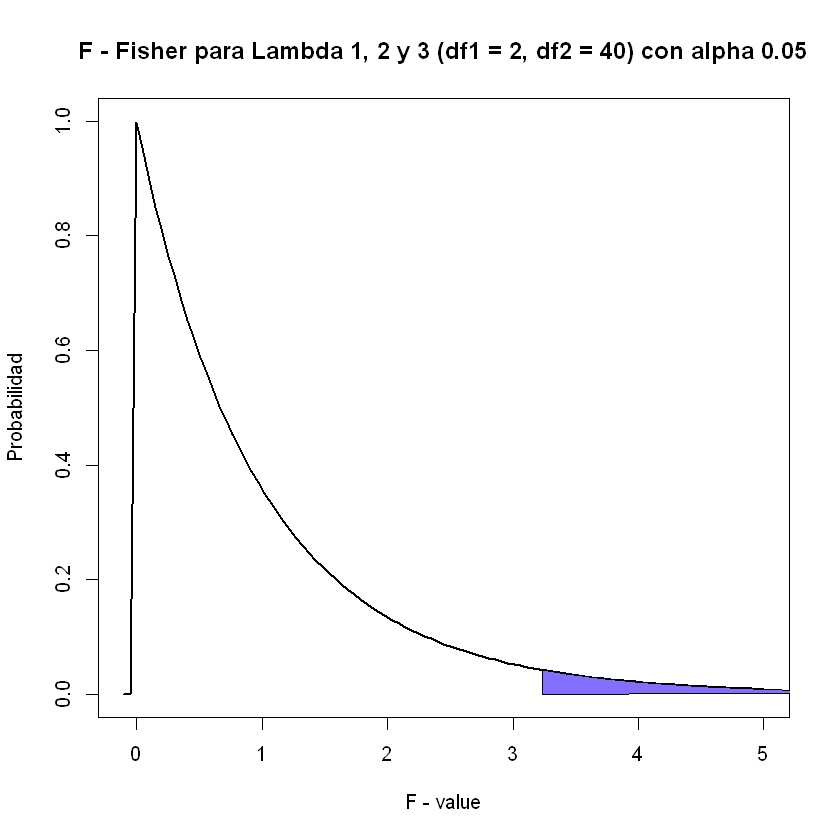

In [8]:
# Estimación sigma^2 (Beta moño)
Ym = X %*% Betasm
Em = Y - Ym
sigma2 = as.numeric((t(Em) %*% Em) / (T - K))
R.Aux = Em ** 2 / sigma2
Emi = Em

T.Lambdas = function(Val){
    if(Val == 'No rechazo'){ 
        #Prueba Jarque Bera (Normalidad en el error)
        VcJB = qchisq(alpha, df = 2, lower.tail = FALSE)
        S = (sum(Em ** 3) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 3)
        K1 = (sum(Em ** 4) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 4)
        JB = T * ((S ** 2 / 6) + ((K1 - 3) ** 2 / 24))

        #Matriz var - cov betas
        vcB = sigma2 * solve(t(X) %*% X)

        #Lambda 1 (Multiplicadores de Lagrange)
        #Lambda 1 por una F - Fisher
        L1F = as.numeric((t(RB - r) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (RB - r)) / (J * sigma2))
        VCF = qf(p = alpha, df1 = J, df2 = (T - K), lower.tail = FALSE)
        #Lambda 1 por el test de la raíz de Lambda 1 si J = 1
        L1t = as.numeric(RB - r) / (sqrt(as.numeric(R %*% vcB %*% t(R))))
        #Valor crítico de 1t o 2t
        if(Test == '2t'){
            VCt = qt(p = (alpha/2), df = (T - K), lower.tail = FALSE)        # True = cola izquierda, False = cola derecha  
        } else {
            VCt = qt(p = alpha, df = (T - K), lower.tail = FALSE) 
        }        

        #Lambda 2 (Razón de verosimilitud)
        #Beta moño
        Ym = X %*% Betasm
        Em = Y - Ym
        SRCnr = as.numeric(t(Em) %*% Em)
        #Beta estrella
        Ye = X %*% Betase
        Ee = Y - Ye
        SRCr = as.numeric(t(Ee) %*% Ee)
        L2 = (SRCr - SRCnr) / (J * sigma2)

        #Lambda 3 (Test de Wold)
        L3 = as.numeric((t(Betase - Betasm) %*% (t(X) %*% X) %*% (Betase - Betasm)) / (J * sigma2))

        #Salidas
        #Jarque Bera
        if(JB < VcJB){
            print(sprintf('No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores', alpha))
                #Test de Lambdas
            if(L1F < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }
            if(J == 1){                                             
                if(Test == '1tl'){
                    if(L1t < -VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                if(Test == '1tr'){
                    if(L1t > VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                Check = between(L1t, -VCt, VCt)
                if(Test == '2t'){               
                    if(Check == TRUE){
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
            } else {
                print('No se puede hacer por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange) porque la F no tiene (1, (T - K)) grados de libertad')
            }
            if(L2 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }
            if(L3 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }

            #Gráficas
            #Lambda 1 con t
            if(J == 1){
                if(Test == '1tr'){
                #Int. Confianza 1tr
                    Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                    Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student cola derecha (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
            } 
            if(Test == '1tl'){
            #Int. Confianza 1tl
                Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                    main = sprintf("t - Student cola izquierda (df = %s) con alpha %s", (T-K), alpha),
                    xlab = 't - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
            }
            if(Test == '2t'){
            #Int. Confianza 2t
                Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                    main = sprintf("t - Student dos colas (df = %s) con alpha %s", (T-K), alpha),
                    xlab = 't - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
            }
            }else{
                #Lambda 1,2 y 3 con F
                Cord.x = c(VCF, seq(VCF, 6, 0.01), Inf)
                Cord.y = c(0, df(seq(VCF, 6, 0.01), df1 = J, df2 = (T - K)), 0)
                plot(function(x) df(x, df1 = J, df2 = (T - K)), xlim = c(-0.1, 5), ylim = c( 0, 1),
                    main = sprintf("F - Fisher para Lambda 1, 2 y 3 (df1 = %s, df2 = %s) con alpha %s", J, (T-K), alpha),
                    xlab = 'F - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1F, y = df(L1F, df1 = J, df2 = (T - K)), col = "red",pch = 19, lwd = 7)
                points(x = L2, y = df(L2, df1 = J, df2 = (T - K)), col = "blue",pch = 19, lwd = 5)
                points(x = L3, y = df(L3, df1 = J, df2 = (T - K)), col = "green",pch = 19, lwd = 3)
            }
        }else{
            print(sprintf('Hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores, por lo que no es posible hacer inferencia', alpha))
        }
    }
}

T.Lambdasfix = function(Val){
    if (Val == 'Rechazo'){
        #Datos estrella                                     #Modifica datos estrella por cantidad de X
        Y = P %*% Y
        X1 = P %*% X1
        X2 = P %*% X2

        #Estimación de los betas                        #Cambio
        Y = cbind(Y)
        X = cbind(1, X1, X2)
        Betasm = solve(t(X) %*% X) %*% (t(X) %*% Y)
        RB = R %*% Betasm                                        
        Betase = Betasm + solve(t(X) %*% X) %*% t(R) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (r - RB)

        ############################################################################################################################################

        #Estimación sigma^2 (Beta moño)
        Ym = X %*% Betasm
        Em = Y - Ym
        sigma2 = as.numeric((t(Em) %*% Em) / (T - K))

        #Prueba Jarque Bera (Normalidad en el error)
        # JB = jarque.bera.test(Em)                     #Forma rápida
        VcJB = qchisq(alpha, df = 2, lower.tail = FALSE)
        S = (sum((Em - mean(Em)) ** 3) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 3)
        K1 = (sum((Em - mean(Em)) ** 4) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 4)
        JB = T * ((S ** 2 / 6) + ((K1 - 3) ** 2 / 24))

        #Matriz var - cov betas
        vcB = sigma2 * solve(t(X) %*% X)

        #Lambda 1 (Multiplicadores de Lagrange)
        #Lambda 1 por una F - Fisher
        L1F = as.numeric((t(RB - r) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (RB - r)) / (J * sigma2))
        VCF = qf(p = alpha, df1 = J, df2 = (T - K), lower.tail = FALSE)
        #Lambda 1 por el test de la raíz de Lambda 1 si J = 1
        L1t = as.numeric(RB - r) / (sqrt(as.numeric(R %*% vcB %*% t(R))))
        #Valor crítico de 1t o 2t
        if(Test == '2t'){
            VCt = qt(p = (alpha/2), df = (T - K), lower.tail = FALSE)        # True = cola izquierda, False = cola derecha  
        } else {
            VCt = qt(p = alpha, df = (T - K), lower.tail = FALSE) 
        }        

        #Lambda 2 (Razón de verosimilitud)
        # Beta moño
        Ym = X %*% Betasm
        Em = Y - Ym
        SRCnr = as.numeric(t(Em) %*% Em)
        #Beta estrella
        Ye = X %*% Betase
        Ee = Y - Ye
        SRCr = as.numeric(t(Ee) %*% Ee)
        L2 = (SRCr - SRCnr) / (J * sigma2)

        #Lambda 3 (Test de Wold)
        # L3 = as.numeric((t(Betase - Betasm) %*% (t(X) %*% X) %*% (Betase - Betasm)) / (J * sigma2))
        L3 = L1F

        #Salidas
        #Jarque Bera
        if(JB < VcJB){
            print(sprintf('No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores', alpha))
                #Test de Lambdas
            if(L1F < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }
            if(J == 1){                                             
                if(Test == '1tl'){
                    if(L1t < -VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                if(Test == '1tr'){
                    if(L1t > VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                Check = between(L1t, -VCt, VCt)
                if(Test == '2t'){               
                    if(Check == TRUE){
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
            } else {
                print('No se puede hacer por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange) porque la F no tiene (1, (T - K)) grados de libertad')
            }
            if(L2 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }
            if(L3 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }

            #Gráficas
            #Lambda 1 con t
            par(mfrow = c(2, 1))
            plot(x = 1 : T, y = Var[,1],
                main = 'Errores estimados al cuadrado',
                xlab = sprintf('T desde 1 hasta %s', T),
                ylab = 'Residuales al cuadrado',
                ylim = c(0, 10))
            if(J == 1){
                if(Test == '1tr'){
                #Int. Confianza 1tr
                    Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                    Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student cola derecha (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
            } 
            if(Test == '1tl'){
            #Int. Confianza 1tl
                Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                    main = sprintf("t - Student cola izquierda (df = %s) con alpha %s", (T-K), alpha),
                    xlab = 't - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
            }
            if(Test == '2t'){
            #Int. Confianza 2t
                Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                    main = sprintf("t - Student dos colas (df = %s) con alpha %s", (T-K), alpha),
                    xlab = 't - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
            }
            } else {
                #Lambda 1,2 y 3 con F
                Cord.x = c(VCF, seq(VCF, 6, 0.01), Inf)
                Cord.y = c(0, df(seq(VCF, 6, 0.01), df1 = J, df2 = (T - K)), 0)
                plot(function(x) df(x, df1 = J, df2 = (T - K)), xlim = c(-0.1, 5), ylim = c( 0, 1),
                    main = sprintf("F - Fisher para Lambda 1, 2 y 3 (df1 = %s, df2 = %s) con alpha %s", J, (T-K), alpha),
                    xlab = 'F - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1F, y = df(L1F, df1 = J, df2 = (T - K)), col = "red",pch = 19, lwd = 7)
                points(x = L2, y = df(L2, df1 = J, df2 = (T - K)), col = "blue",pch = 19, lwd = 5)
                points(x = L3, y = df(L3, df1 = J, df2 = (T - K)), col = "green",pch = 19, lwd = 3)
            }
            par(mfrow = c(1, 1))
        }else{
            print(sprintf('Hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores, por lo que no es posible hacer inferencia', alpha))
        }
    }
}

if (Tipo == 'BP'){
    # Breush Pagan----
    #Cálculo de la heterosedasticidad
    NFile = X
    BP_Test = function(X.){
        Betas.Aux = solve(t(X.) %*% X.) %*% (t(X.) %*% R.Aux)
        Y.Aux = X. %*% Betas.Aux
           SEC = (Y.Aux - mean(R.Aux)) ** 2
        STC = (R.Aux - mean(R.Aux)) ** 2
        R2 = sum(SEC) / sum(STC)
        BP = T * R2
    }

    BP = matrix(, nrow = K, 4)
    colnames(BP) = c('Vc BP', 'Vc Chi-S', 'Hi', 'Result')
    rownames(BP) = c(colnames(NFile))
    rownames(BP)[1] = 'X'
    X.BP = round(BP_Test(X), 4)
    for (i in 1 : (K - 1)){
        X. = cbind(1, NFile[, i + 1])
        BP[i + 1] = rbind(round(BP_Test(X.), 4))
        BP[1] = rbind(X.BP)
        for (n in 1 : (K - 1)){
            BP[1, 2] = round(qchisq(p = alpha, df = (K - 1), lower.tail = FALSE), 4)
            BP[n + 1, 2] = round(qchisq(p = alpha, df = 1, lower.tail = FALSE), 4)
        }
    }
    for (j in 1 : K){
        if (BP[j, 1] < BP[j, 2]){
            BP[j, 3] = 0
        } else {
            BP[j, 3] = 1
        }
    }
    for (j in 1 : K){
    if (BP[j, 3] == 0){
        BP[j, 4] = sprintf('No hay s. e. r Homosedasticidad a un alpha = %s', alpha)
    } else {
        BP[j, 4] = sprintf('Hay s. e. r Homosedasticidad a un alpha = %s', alpha)
    }
    }

    print(BP[, -3])

    #Diferencia de Varianzas
    X.h = X
    #Construcción de la matriz organizada de X, Y y los errores al cuadrado
    Betas.h = solve(t(X.h) %*% X.h) %*% (t(X.h) %*% Y)
    Y.h = X.h %*% Betas.h 
    Em.h = Y - Y.h 
    colnames(Em.h) = 'Emh'
    M.Em.h2.1 = cbind(X, Y, (Em.h ** 2))
    M.Em.h2 = M.Em.h2.1[order(M.Em.h2.1[, as.numeric(dim(M.Em.h2.1)[2])], decreasing = TRUE), ]

    #Función para el cálculo de los sigmas en donde adentro de la función vamos a encontrar la construcción de los betas
    Sigma.h = function(x, y, t1, t2){
        T.h = as.numeric(dim(x)[1])
        K.h = as.numeric(dim(x)[2])
        Betas.h1 = solve(t(x) %*% x) %*% (t(x) %*% y)
        Em.h2 = y - (x %*% Betas.h1)
        Sigma.h1 = (t(Em.h2[t1 : t2]) %*% Em.h2[t1 : t2]) / (T.h - K.h)
    }

    Var = matrix(, ncol = 2, nrow = T)
    colnames(Var) = c('R. Cociente', 'Si/No Rechazo')

    for (t in K + 1 : T - K - 1){
        SigmaT1 = Sigma.h(x = X.h, y = Y, t1 = 1, t2 = t)
        SigmaT2 = Sigma.h(x = X.h, y = Y, t1 = (t + 1), t2 = (T - K - 1))
        Cociente = SigmaT1 / SigmaT2
        Var[t, 1] = Cociente
        if (Cociente < qf(p = alpha, df1 = length(M.Em.h2[K + 1 : t]), df2 = length(M.Em.h2[t : (T - K - 1)]), lower.tail = FALSE) &
            Cociente > qf(p = alpha, df1 = length(M.Em.h2[K + 1 : t]), df2 = length(M.Em.h2[t : (T - K - 1)]), lower.tail = TRUE)){
                Var[t, 2] = sprintf('No hay s. e. r Homosedasticidad (Cociente = 1) a un alpha = %s', alpha)
        } else {
            Var[t, 2] = sprintf('Hay s. e. r Homosedasticidad (Cociente = 1) a un alpha = %s', alpha)
        }
    }

    SigmaT1 = var(M.Em.h2.1[1 : Quiebre, 3])
    SigmaT2 = var(M.Em.h2.1[Quiebre : T, 3])
    T1 = Quiebre
    T2 = T - T1

    P = diag(x = 1, nrow = T, ncol = T)
    for (i in 1 : T1){
        P[i, i] = SigmaT1
        for (j in T1 + 1: T2){
        P[j, j] = SigmaT2
        }
    }

    if(BP[1, 4] == sprintf('Hay s. e. r Homosedasticidad a un alpha = %s', alpha)){
        print(sprintf('Hay suficiente evidencia para rechazar Homosedasticidad a un alpha = %s', alpha))
        T.Lambdasfix('Rechazo')
    }
    if(BP[1, 4] == sprintf('No hay s. e. r Homosedasticidad a un alpha = %s', alpha)){
        print(sprintf('Hay suficiente evidencia para rechazar Homosedasticidad a un alpha = %s', alpha))
        T.Lambdas('No rechazo')
    }
}

if (Tipo == 'White'){
    # Test de White ----
    # Cálculo de la heterosedasticidad
    R.Aux = Em ** 2
    NFile = matrix(X[], nrow = T)
    for (i in 2 : K){
        for (j in i : K){
            NFile = cbind(NFile, NFile[,i] * NFile[,j])
        }
    }
    # NFile = NFile[, -15]            #Poner el número de la columna que genera error
    X. = NFile
    BP_Test = function(X){
        Betas.Aux = solve(t(X.) %*% X.) %*% (t(X.) %*% R.Aux)
        Y.Aux = X. %*% Betas.Aux
        SEC = (Y.Aux - mean(R.Aux)) ** 2
        STC = (R.Aux - mean(R.Aux)) ** 2
        R2 = sum(SEC) / sum(STC)
        BP = T * R2
    }

    K1 = ncol(NFile)
    BP = matrix(, nrow = K1, 4)
    colnames(BP) = c('Vc White', 'Vc Chi-S', 'Result', 'Result')
    # rownames(BP) = c(colnames(NFile))
    # rownames(BP)[1] = 'X'
    X.BP = round(BP_Test(X), 4)
    for (i in 1 : (K1 - 1)){
        X. = cbind(1, NFile[, i + 1])
        BP[i + 1] = rbind(round(BP_Test(X.), 4))
        BP[1] = rbind(X.BP)
        for (n in 1 : (K1 - 1)){
            BP[1, 2] = round(qchisq(p = alpha, df = (K1 - 1), lower.tail = FALSE), 4)
            BP[n + 1, 2] = round(qchisq(p = alpha, df = 1, lower.tail = FALSE), 4)
        }
    }
    for (j in 1 : K1){
        if (BP[j, 1] < BP[j, 2]){
            BP[j, 3] = 0
        } else {
            BP[j, 3] = 1
        }
    }
    for (j in 1 : K1){
        if (BP[j, 3] == 0){
            BP[j, 4] = sprintf('No hay s. e. r Homosedasticidad a un alpha = %s', alpha)
        } else {
            BP[j, 4] = sprintf('Hay s. e. r Homosedasticidad a un alpha = %s', alpha)
        }
    }

    print(BP[, -3])

    #Diferencia de Varianzas
    X.h = matrix(, nrow = T, ncol = K1 - 1)     #Se toman únicamente las variables que generan heterosedasticidad
    for (i in 1 : K1 - 1){
        if(BP[i + 1, 3] == 1){
            X.h[, i] = NFile[, i + 1]
        }
    }

    delete.na <- function(df, n=0) {
        df[, colSums(is.na(df)) <= n]
    }
    X.h = delete.na(X.h)

    #Construcción de la matriz organizada de X, Y y los errores al cuadrado
    Betas.h = solve(t(X.h) %*% X.h) %*% (t(X.h) %*% Y)
    Y.h = X.h %*% Betas.h 
    Em.h = Y - Y.h 
    colnames(Em.h) = 'Emh'
    M.Em.h2.1 = cbind(X, Y, (Em.h ** 2))
    M.Em.h2 = M.Em.h2.1[order(M.Em.h2.1[, as.numeric(dim(M.Em.h2.1)[2])], decreasing = TRUE), ]

    #Función para el cálculo de los sigmas en donde adentro de la función vamos a encontrar la construcción de los betas
    Sigma.h = function(x, y, t1, t2){
        T.h = as.numeric(dim(x)[1])
        K.h = as.numeric(dim(x)[2])
        Betas.h1 = solve(t(x) %*% x) %*% (t(x) %*% y)
        Em.h2 = y - (x %*% Betas.h1)
        Sigma.h1 = (t(Em.h2[t1 : t2]) %*% Em.h2[t1 : t2]) / (T.h - K.h)
    }

    Var = matrix(, ncol = 2, nrow = T)
    colnames(Var) = c('R. Cociente', 'Si/No Rechazo')

    for (t in K + 1 : T - K - 1){
        SigmaT1 = Sigma.h(x = X.h, y = Y, t1 = 1, t2 = t)
        SigmaT2 = Sigma.h(x = X.h, y = Y, t1 = (t + 1), t2 = (T - K - 1))
        Cociente = SigmaT1 / SigmaT2
        Var[t, 1] = Cociente
        if (Cociente < qf(p = (alpha / 2), df1 = length(M.Em.h2[K + 1 : t]), df2 = length(M.Em.h2[t : (T - K - 1)]), lower.tail = FALSE) &
            Cociente > qf(p = (alpha / 2), df1 = length(M.Em.h2[K + 1 : t]), df2 = length(M.Em.h2[t : (T - K - 1)]), lower.tail = TRUE)){
                Var[t, 2] = sprintf('No hay s. e. r Homosedasticidad (Cociente = 1) a un alpha = %s', alpha)
        } else {
            Var[t, 2] = sprintf('Hay s. e. r Homosedasticidad (Cociente = 1) a un alpha = %s', alpha)
        }
    }

    SigmaT1 = var(M.Em.h2.1[1 : Quiebre, 3])
    SigmaT2 = var(M.Em.h2.1[Quiebre : T, 3])
    T1 = Quiebre
    T2 = T - T1

    P = diag(x = 1, nrow = T, ncol = T)
    for (i in 1 : T1){
        P[i, i] = 1 / SigmaT1
        for (j in T1 + 1: T2){
        P[j, j] = 1 / SigmaT2
        }
    }

    if(BP[1, 4] == sprintf('Hay s. e. r Homosedasticidad a un alpha = %s', alpha)){
        print(sprintf('Hay suficiente evidencia para rechazar Homosedasticidad a un alpha = %s', alpha))
        T.Lambdasfix('Rechazo')
    }
    if(BP[1, 4] == sprintf('No hay s. e. r Homosedasticidad a un alpha = %s', alpha)){
        print(sprintf('Hay suficiente evidencia para rechazar Homosedasticidad a un alpha = %s', alpha))
        T.Lambdas('No rechazo')
    }
}


## Prueba de hipótesis para serie de tiempo
- Para realizar esta prueba se van a utilizar tests como:
  - Test de multiplicadores de lagrange: Muestra la diferencia que existe entre el beta moño (ols) y H0.
    - Test de la raíz de multiplciadores de lagrange: Se puede utilizar únicamente bajo una restricción.
  - Test de razón de verosimiltud: Muestra la distancia de los residuales de beta estrella (m. v) y el beta moño (ols).
  - Test de Wold: Muestra la diferencia del beta de la economía y el beta de la restricción.
- Por lo general se suele encontrar problema de autocorrelación en datos de serie de tiempo como los de inflación vs desempleo desde el año 2000 hasta el 2020 mensual, el cual consiste en que los datos de hoy dependen de los de ayer (t - 1) o de los de antier (t - 2) viéndose en que la parte superior e inferior de la diagonal de la matriz de varianza y covarianza del error estimado son diferentes de 0 (covarianza diferente de 0), pudiéndose detectar por medio de tests como la prueba de Durbin - Watson, que una vez corregido, la matriz var - cov del error estimado en su parte superior en inferior tendrá solo 0.

<center><img src= "https://www.estadistica.net/PAU3/estadistico-durbin-watson.png" title = 'Tabla de valores Durbin Watson' width="500px" ></center>

In [9]:
#Inputs
Test = '2t'                             #'1tl', '1tr', '2t'
alpha = 0.05
Rho_i = 'No dado'                       #'No dado' si no lo tiene, cuál es el valor (Valor del Rho para Durbin - Watson)
Dl = 1.336                              # Límite inferior del valor correspondiente a la tabla durbin watson
Du = 1.720                              # Límite superior del valor correspondiente a la tabla durbin watson

#Matriz Restricción
R1 = c(0, 1, 0, 0 ,0)                       #Cada restricción
R2 = c(0, 0, 1, 0, 0)
R = c(R1, R2)                            #Matriz de restricciones
J = 2                                   #Número de restricciones
r = c(0, 0)

# Parámetros y transformaciones lineales
Y = log(File$Cij)
X1 = log(File$Yi)
X2 = log(File$Yj)
X3 = log(File$Dij)
X4 = (File$Acuerdo)
T = length(Y)
K = ncol(File) - 2

#Conformación matriz R
R = matrix(R, nrow = as.numeric(length(R1)), ncol = J)
R = t(R)

#Estimación de los betas
Y = cbind(Y)
X = cbind(1, X1, X2, X3, X4)
Betasm = solve(t(X) %*% X) %*% (t(X) %*% Y)
RB = R %*% Betasm                                        
Betase = Betasm + solve(t(X) %*% X) %*% t(R) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (r - RB)

[1] "El valor del estádistico de Durbin - Watson es: 1.372"
[1] "Hay suficiente evidencia (indecisión) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de 0.05"
[1] "Haga uso de otro estadístico para evaluar la no - autocorrelación en los errores."


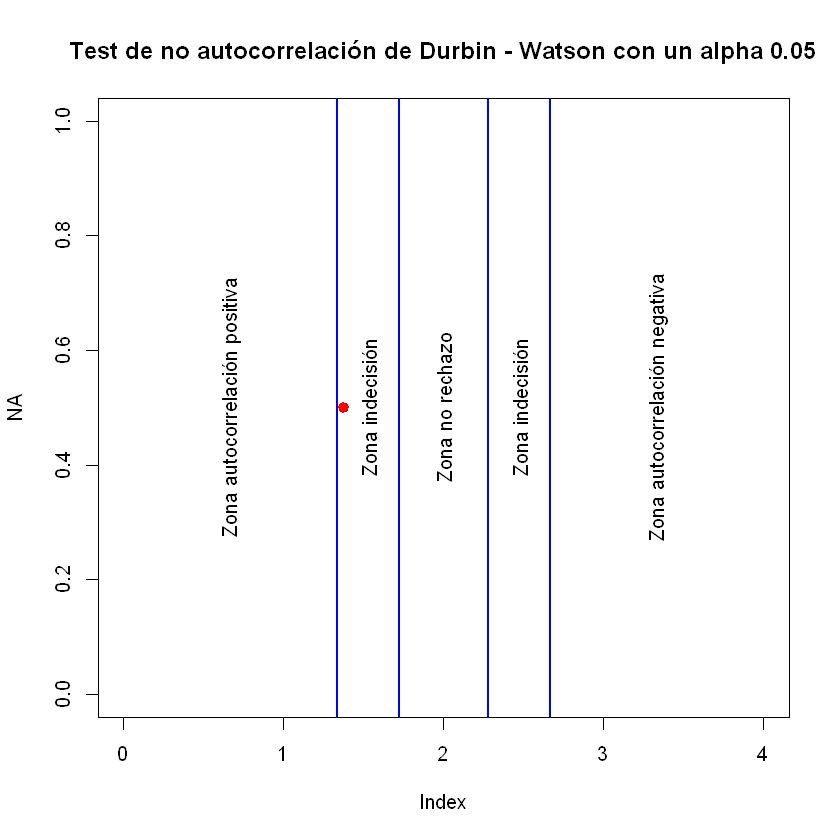

In [10]:
# Estimación sigma^2 (Beta moño)
Ym = X %*% Betasm
Em = Y - Ym
sigma2 = as.numeric((t(Em) %*% Em) / (T - K))

T.Lambdas = function(Val){
    if(Val == 'No rechazo'){ 
        #Prueba Jarque Bera (Normalidad en el error)
        VcJB = qchisq(alpha, df = 2, lower.tail = FALSE)
        S = (sum(Em ** 3) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 3)
        K1 = (sum(Em ** 4) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 4)
        JB = T * ((S ** 2 / 6) + ((K1 - 3) ** 2 / 24))

        #Matriz var - cov betas
        vcB = sigma2 * solve(t(X) %*% X)

        #Lambda 1 (Multiplicadores de Lagrange)
        #Lambda 1 por una F - Fisher
        L1F = as.numeric((t(RB - r) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (RB - r)) / (J * sigma2))
        VCF = qf(p = alpha, df1 = J, df2 = (T - K), lower.tail = FALSE)
        #Lambda 1 por el test de la raíz de Lambda 1 si J = 1
        L1t = as.numeric(RB - r) / (sqrt(as.numeric(R %*% vcB %*% t(R))))
        #Valor crítico de 1t o 2t
        if(Test == '2t'){
            VCt = qt(p = (alpha/2), df = (T - K), lower.tail = FALSE)        # True = cola izquierda, False = cola derecha  
        } else {
            VCt = qt(p = alpha, df = (T - K), lower.tail = FALSE) 
        }        

        #Lambda 2 (Razón de verosimilitud)
        #Beta moño
        Ym = X %*% Betasm
        Em = Y - Ym
        SRCnr = as.numeric(t(Em) %*% Em)
        #Beta estrella
        Ye = X %*% Betase
        Ee = Y - Ye
        SRCr = as.numeric(t(Ee) %*% Ee)
        L2 = (SRCr - SRCnr) / (J * sigma2)

        #Lambda 3 (Test de Wold)
        L3 = as.numeric((t(Betase - Betasm) %*% (t(X) %*% X) %*% (Betase - Betasm)) / (J * sigma2))

        #Salidas
        #Jarque Bera
        if(JB < VcJB){
            print(sprintf('No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores', alpha))
                #Test de Lambdas
            if(L1F < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }
            if(J == 1){                                             
                if(Test == '1tl'){
                    if(L1t < -VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                if(Test == '1tr'){
                    if(L1t > VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                Check = between(L1t, -VCt, VCt)
                if(Test == '2t'){               
                    if(Check == TRUE){
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
            } else {
                print('No se puede hacer por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange) porque la F no tiene (1, (T - K)) grados de libertad')
            }
            if(L2 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }
            if(L3 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }

            #Gráficas
            #Lambda 1 con t
            par(mfrow = c(2, 1))
            plot(NA, xlim = c(0, 4), ylim = c(0, 1),
                main = sprintf("Test de no autocorrelación de Durbin - Watson con un alpha %s", alpha))
                abline(v = Dl, col = "blue", lwd = 2)
                abline(v = Du, col = 'blue', lwd = 2)
                abline(v = 4 - Dl, col = 'blue', lwd = 2)
                abline(v = 4 - Du, col = 'blue', lwd = 2)
                points(x = Dw, y = 0.5, col = "red",pch = 19, lwd = 3)
                text(x = Dl/2, y = 0.5, 'Zona autocorrelación positiva', srt = 90)
                text(x = (4 - Dl) + (Dl / 2), y = 0.5, 'Zona autocorrelación negativa', srt = 90)
                text(x = (Dl) + ((Du - Dl) / 2), y = 0.5, 'Zona indecisión', srt = 90)
                text(x = (4 - Du) + ((Du - Dl) / 2), y = 0.5, 'Zona indecisión', srt = 90)
                text(x = (Du) + ((4 - 2 * Du) / 2), y = 0.5, 'Zona no rechazo', srt = 90)
            if(J == 1){
                if(Test == '1tr'){
                #Int. Confianza 1tr
                    Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                    Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student cola derecha (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
                } 
                if(Test == '1tl'){
                #Int. Confianza 1tl
                    Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                    Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student cola izquierda (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
                }
                if(Test == '2t'){
                #Int. Confianza 2t
                    Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                    Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student dos colas (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                    Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
                }
            }else{
                #Lambda 1,2 y 3 con F
                Cord.x = c(VCF, seq(VCF, 6, 0.01), Inf)
                Cord.y = c(0, df(seq(VCF, 6, 0.01), df1 = J, df2 = (T - K)), 0)
                plot(function(x) df(x, df1 = J, df2 = (T - K)), xlim = c(-0.1, 5), ylim = c( 0, 1),
                    main = sprintf("F - Fisher para Lambda 1, 2 y 3 (df1 = %s, df2 = %s) con alpha %s", J, (T-K), alpha),
                    xlab = 'F - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1F, y = df(L1F, df1 = J, df2 = (T - K)), col = "red",pch = 19, lwd = 7)
                points(x = L2, y = df(L2, df1 = J, df2 = (T - K)), col = "blue",pch = 19, lwd = 5)
                points(x = L3, y = df(L3, df1 = J, df2 = (T - K)), col = "green",pch = 19, lwd = 3)
            }
            par(mfrow = c(1, 1))
        }else{
            print(sprintf('Hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores, por lo que no es posible hacer inferencia', alpha))
        }
    }
}

T.Lambdasfix = function(Val){
    if(Val == 'Rechazo'){ 
        ############################################################################################################################################
        # Matriz de Cholesky
        Emt1 = Em[-1]
        Emt = Em[-T]
        Rho = as.numeric(t(Emt) %*% Emt1) / as.numeric(t(Emt1) %*% Emt1)

        P = diag(x = 1, nrow = T, ncol = T)
        P = replace(P, 1, sqrt(1 - (Rho ** 2)))
        for (i in 1 : T - 1){
            P[i + 1, i] = Rho
        }

        #Datos estrella                                     #Modifica datos estrella por cantidad de X
        Y = P %*% Y
        X1 = P %*% X1
        X2 = P %*% X2

        #Cuchilla de Cochrane
        Y = Y[-1]
        X1 = X1[-1]
        X2 = X2[-1]
        T = T - 1

        #Estimación de los betas                        #Cambio
        Y = cbind(Y)
        X = cbind(1, X1, X2)
        Betasm = solve(t(X) %*% X) %*% (t(X) %*% Y)
        RB = R %*% Betasm                                        
        Betase = Betasm + solve(t(X) %*% X) %*% t(R) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (r - RB)

        ############################################################################################################################################

        #Estimación sigma^2 (Beta moño)
        Ym = X %*% Betasm
        Em = Y - Ym
        sigma2 = as.numeric((t(Em) %*% Em) / (T - K))

        #Durbin Watson
        Emt1 = Em[-T]
        Emt = Em[-1]
        Dw = sum((Emt - Emt1) ** 2) / (sigma2 * (T - K))

        #Prueba Jarque Bera (Normalidad en el error)
        # JB = jarque.bera.test(Em)                     #Forma rápida
        VcJB = qchisq(alpha, df = 2, lower.tail = FALSE)
        S = (sum((Em - mean(Em)) ** 3) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 3)
        K1 = (sum((Em - mean(Em)) ** 4) / T) / (sqrt(as.numeric((t(Em) %*% Em) / T)) ** 4)
        JB = T * ((S ** 2 / 6) + ((K1 - 3) ** 2 / 24))

        #Matriz var - cov betas
        vcB = sigma2 * solve(t(X) %*% X)

        #Lambda 1 (Multiplicadores de Lagrange)
        #Lambda 1 por una F - Fisher
        L1F = as.numeric((t(RB - r) %*% solve(R %*% solve(t(X) %*% X) %*% t(R)) %*% (RB - r)) / (J * sigma2))
        VCF = qf(p = alpha, df1 = J, df2 = (T - K), lower.tail = FALSE)
        #Lambda 1 por el test de la raíz de Lambda 1 si J = 1
        L1t = as.numeric(RB - r) / (sqrt(as.numeric(R %*% vcB %*% t(R))))
        #Valor crítico de 1t o 2t
        if(Test == '2t'){
            VCt = qt(p = (alpha/2), df = (T - K), lower.tail = FALSE)        # True = cola izquierda, False = cola derecha  
        } else {
            VCt = qt(p = alpha, df = (T - K), lower.tail = FALSE) 
        }        

        #Lambda 2 (Razón de verosimilitud)
        #Beta moño
        Ym = X %*% Betasm
        Em = Y - Ym
        SRCnr = as.numeric(t(Em) %*% Em)
        #Beta estrella
        Ye = X %*% Betase
        Ee = Y - Ye
        SRCr = as.numeric(t(Ee) %*% Ee)
        L2 = (SRCr - SRCnr) / (J * sigma2)

        #Lambda 3 (Test de Wold)
        L3 = as.numeric((t(Betase - Betasm) %*% (t(X) %*% X) %*% (Betase - Betasm)) / (J * sigma2))

        #Salidas
        #Jarque Bera
        if(JB < VcJB){
            print(sprintf('No hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores', alpha))
                #Test de Lambdas
            if(L1F < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de multiplicadores de lagrange', alpha))
            }
            if(J == 1){                                             
                if(Test == '1tl'){
                    if(L1t < -VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                if(Test == '1tr'){
                    if(L1t > VCt){
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
                Check = between(L1t, -VCt, VCt)
                if(Test == '2t'){               
                    if(Check == TRUE){
                        print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }else{
                        print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange)', alpha))
                    }
                }
            } else {
                print('No se puede hacer por medio de la raíz de Lambda 1 (test de multiplicadores de Lagrange) porque la F no tiene (1, (T - K)) grados de libertad')
            }
            if(L2 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de razón de verosimilitud', alpha))
            }
            if(L3 < VCF){
                print(sprintf('No hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }else{
                print(sprintf('Hay suficiente evidencia para rechazar H0 a un nivel de significancia alpha de: %s, por medio del test de Wold', alpha))
            }

            #Gráficas
            #Lambda 1 con t
            par(mfrow = c(2, 1))
            plot(NA, xlim = c(0, 4), ylim = c(0, 1),
                main = sprintf("Test de no autocorrelación de Durbin - Watson con un alpha %s", alpha))
                abline(v = Dl, col = "blue", lwd = 2)
                abline(v = Du, col = 'blue', lwd = 2)
                abline(v = 4 - Dl, col = 'blue', lwd = 2)
                abline(v = 4 - Du, col = 'blue', lwd = 2)
                points(x = Dw, y = 0.5, col = "red",pch = 19, lwd = 3)
                text(x = Dl/2, y = 0.5, 'Zona autocorrelación positiva', srt = 90)
                text(x = (4 - Dl) + (Dl / 2), y = 0.5, 'Zona autocorrelación negativa', srt = 90)
                text(x = (Dl) + ((Du - Dl) / 2), y = 0.5, 'Zona indecisión', srt = 90)
                text(x = (4 - Du) + ((Du - Dl) / 2), y = 0.5, 'Zona indecisión', srt = 90)
                text(x = (Du) + ((4 - 2 * Du) / 2), y = 0.5, 'Zona no rechazo', srt = 90)
            if(J == 1){
                if(Test == '1tr'){
                #Int. Confianza 1tr
                    Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                    Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student cola derecha (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
                } 
                if(Test == '1tl'){
                #Int. Confianza 1tl
                    Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                    Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student cola izquierda (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
                }
                if(Test == '2t'){
                #Int. Confianza 2t
                    Cord.x = c(VCt, seq(VCt, 5, 0.01), Inf)
                    Cord.y = c(0, dt(seq(VCt, 5, 0.01), df = (T - K)), 0)
                    plot(function(x) dt(x, df = (T-K)), xlim = c(-5, 5), ylim = c( 0, 0.4),
                        main = sprintf("t - Student dos colas (df = %s) con alpha %s", (T-K), alpha),
                        xlab = 't - value', ylab = 'Probabilidad',
                        col = "black", type = "l", lwd = 2)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    Cord.x = c(-5, seq(-5, -VCt, 0.01), -VCt)
                    Cord.y = c(0, dt(seq(-5, -VCt, 0.01), df = (T - K)), 0)
                    polygon(Cord.x, Cord.y,
                            col = "slateblue1",
                            border = 1)
                    points(x = L1t, y = dt(L1t, df = (T-K)), col = "red",pch = 19, lwd = 3)
                }
            }else{
                #Lambda 1,2 y 3 con F
                Cord.x = c(VCF, seq(VCF, 6, 0.01), Inf)
                Cord.y = c(0, df(seq(VCF, 6, 0.01), df1 = J, df2 = (T - K)), 0)
                plot(function(x) df(x, df1 = J, df2 = (T - K)), xlim = c(-0.1, 5), ylim = c( 0, 1),
                    main = sprintf("F - Fisher para Lambda 1, 2 y 3 (df1 = %s, df2 = %s) con alpha %s", J, (T-K), alpha),
                    xlab = 'F - value', ylab = 'Probabilidad',
                    col = "black", type = "l", lwd = 2)
                polygon(Cord.x, Cord.y,
                        col = "slateblue1",
                        border = 1)
                points(x = L1F, y = df(L1F, df1 = J, df2 = (T - K)), col = "red",pch = 19, lwd = 7)
                points(x = L2, y = df(L2, df1 = J, df2 = (T - K)), col = "blue",pch = 19, lwd = 5)
                points(x = L3, y = df(L3, df1 = J, df2 = (T - K)), col = "green",pch = 19, lwd = 3)
            }
            par(mfrow = c(1, 1))
        }else{
            print(sprintf('Hay suficiente evidencia para rechazar normalidad en los errores a un nivel de significancia alpha de: %s, por medio del test de Jarque Bera sobre normalidad en los errores, por lo que no es posible hacer inferencia', alpha))
        }

    }
}

Dwgraph = function(Graph){
    if(Graph == 'TRUE'){
        plot(NA, xlim = c(0, 4), ylim = c(0, 1),
                main = sprintf("Test de no autocorrelación de Durbin - Watson con un alpha %s", alpha))
                abline(v = Dl, col = "blue", lwd = 2)
                abline(v = Du, col = 'blue', lwd = 2)
                abline(v = 4 - Dl, col = 'blue', lwd = 2)
                abline(v = 4 - Du, col = 'blue', lwd = 2)
                points(x = Dw, y = 0.5, col = "red",pch = 19, lwd = 3)
                text(x = Dl/2, y = 0.5, 'Zona autocorrelación positiva', srt = 90)
                text(x = (4 - Dl) + (Dl / 2), y = 0.5, 'Zona autocorrelación negativa', srt = 90)
                text(x = (Dl) + ((Du - Dl) / 2), y = 0.5, 'Zona indecisión', srt = 90)
                text(x = (4 - Du) + ((Du - Dl) / 2), y = 0.5, 'Zona indecisión', srt = 90)
                text(x = (Du) + ((4 - 2 * Du) / 2), y = 0.5, 'Zona no rechazo', srt = 90)
    }
}

# Test de Durbin Watson
Emt1 = Em[-T]
Emt = Em[-1]
if(Rho_i == 'No dado'){
    Dw = sum((Emt - Emt1) ** 2) / (sigma2 * (T - K))
    print(sprintf('El valor del estádistico de Durbin - Watson es: %s', round(Dw, 3)))
    if(Dw < Dl){
        print(sprintf('Hay suficiente evidencia (positiva) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        T.Lambdasfix('Rechazo')
    }
    Check = between(Dw, Dl, Du)
    if(Check == 'TRUE'){
        print(sprintf('Hay suficiente evidencia (indecisión) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        print('Haga uso de otro estadístico para evaluar la no - autocorrelación en los errores.')
        Dwgraph('TRUE')
    }
    Check = between(Dw, Du, (4 - Du))
    if(Check == 'TRUE'){
        print(sprintf('No hay suficiente evidencia para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        T.Lambdas('No rechazo')
    } 
    Check = between(Dw, (4 - Du), (4 - Dl))
    if(Check == 'TRUE'){
        print(sprintf('Hay suficiente evidencia (indecisión) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        print('Haga uso de otro estadístico para evaluar la no - autocorrelación en los errores.')
        Dwgraph('TRUE')
    } 
    if(Dw > (4 - Dl)){
        print(sprintf('Hay suficiente evidencia (negativa) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        T.Lambdasfix('Rechazo')
    }
} else {
    Dw = 2 * (1 - as.numeric(Rho_i))
    print(sprintf('El valor del estádistico de Durbin - Watson es: %s', round(Dw, 3)))
    if(Dw < Dl){
        print(sprintf('Hay suficiente evidencia (positiva) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        T.Lambdasfix('Rechazo')
    }
    Check = between(Dw, Dl, Du)
    if(Check == 'TRUE'){
        print(sprintf('Hay suficiente evidencia (indecisión) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        print('Haga uso de otro estadístico para evaluar la no - autocorrelación en los errores.')
        Dwgraph('TRUE')
    }
    Check = between(Dw, Du, (4 - Du))
    if(Check == 'TRUE'){
        print(sprintf('No hay suficiente evidencia para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        T.Lambdas('No rechazo')
    } 
    Check = between(Dw, (4 - Du), (4 - Dl))
    if(Check == 'TRUE'){
        print(sprintf('Hay suficiente evidencia (indecisión) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        print('Haga uso de otro estadístico para evaluar la no - autocorrelación en los errores.')
        Dwgraph('TRUE')
    } 
    if(Dw > (4 - Dl)){
        print(sprintf('Hay suficiente evidencia (negativa) para rechazar no autocorrelación en los errores estimados a un nivel de significancia alpha de %s', alpha))
        T.Lambdasfix('Rechazo')
    }
}